In [1]:
import pyodbc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Establecer la conexión a la base de datos utilizando autenticación de Windows
conn = pyodbc.connect('DRIVER={SQL Server};'
                      'SERVER=JUANBECETI;'
                      'DATABASE=Principal;'
                      'Trusted_Connection=yes;')

# Crear un cursor para ejecutar consultas SQL
cursor = conn.cursor()

# Ejecutar una consulta SQL para seleccionar los datos de la tabla
cursor.execute('SELECT * FROM bank_marketing')

# Obtener todos los resultados de la consulta
rows = cursor.fetchall()

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Crear un DataFrame a partir de los resultados y los nombres de las columnas
marketing = pd.DataFrame.from_records(rows, columns=columns)

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

In [3]:
marketing.tail(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41186,38,blue-collar,married,professional.course,no,True,False,telephone,may,tue,...,1,999,0,nonexistent,11.0,93994.0,-364.0,4857.0,5191.0,False
41187,34,services,married,high.school,unknown,False,False,telephone,may,tue,...,1,999,0,nonexistent,11.0,93994.0,-364.0,4857.0,5191.0,False


In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [5]:
marketing.isna().sum().sort_values(ascending = False)

nr_employed       33425
housing             990
loan                990
euribor3m            25
age                   0
pdays                 0
cons_conf_idx         0
cons_price_idx        0
emp_var_rate          0
poutcome              0
previous              0
duration              0
campaign              0
job                   0
day_of_week           0
month                 0
contact               0
default               0
education             0
marital               0
y                     0
dtype: int64

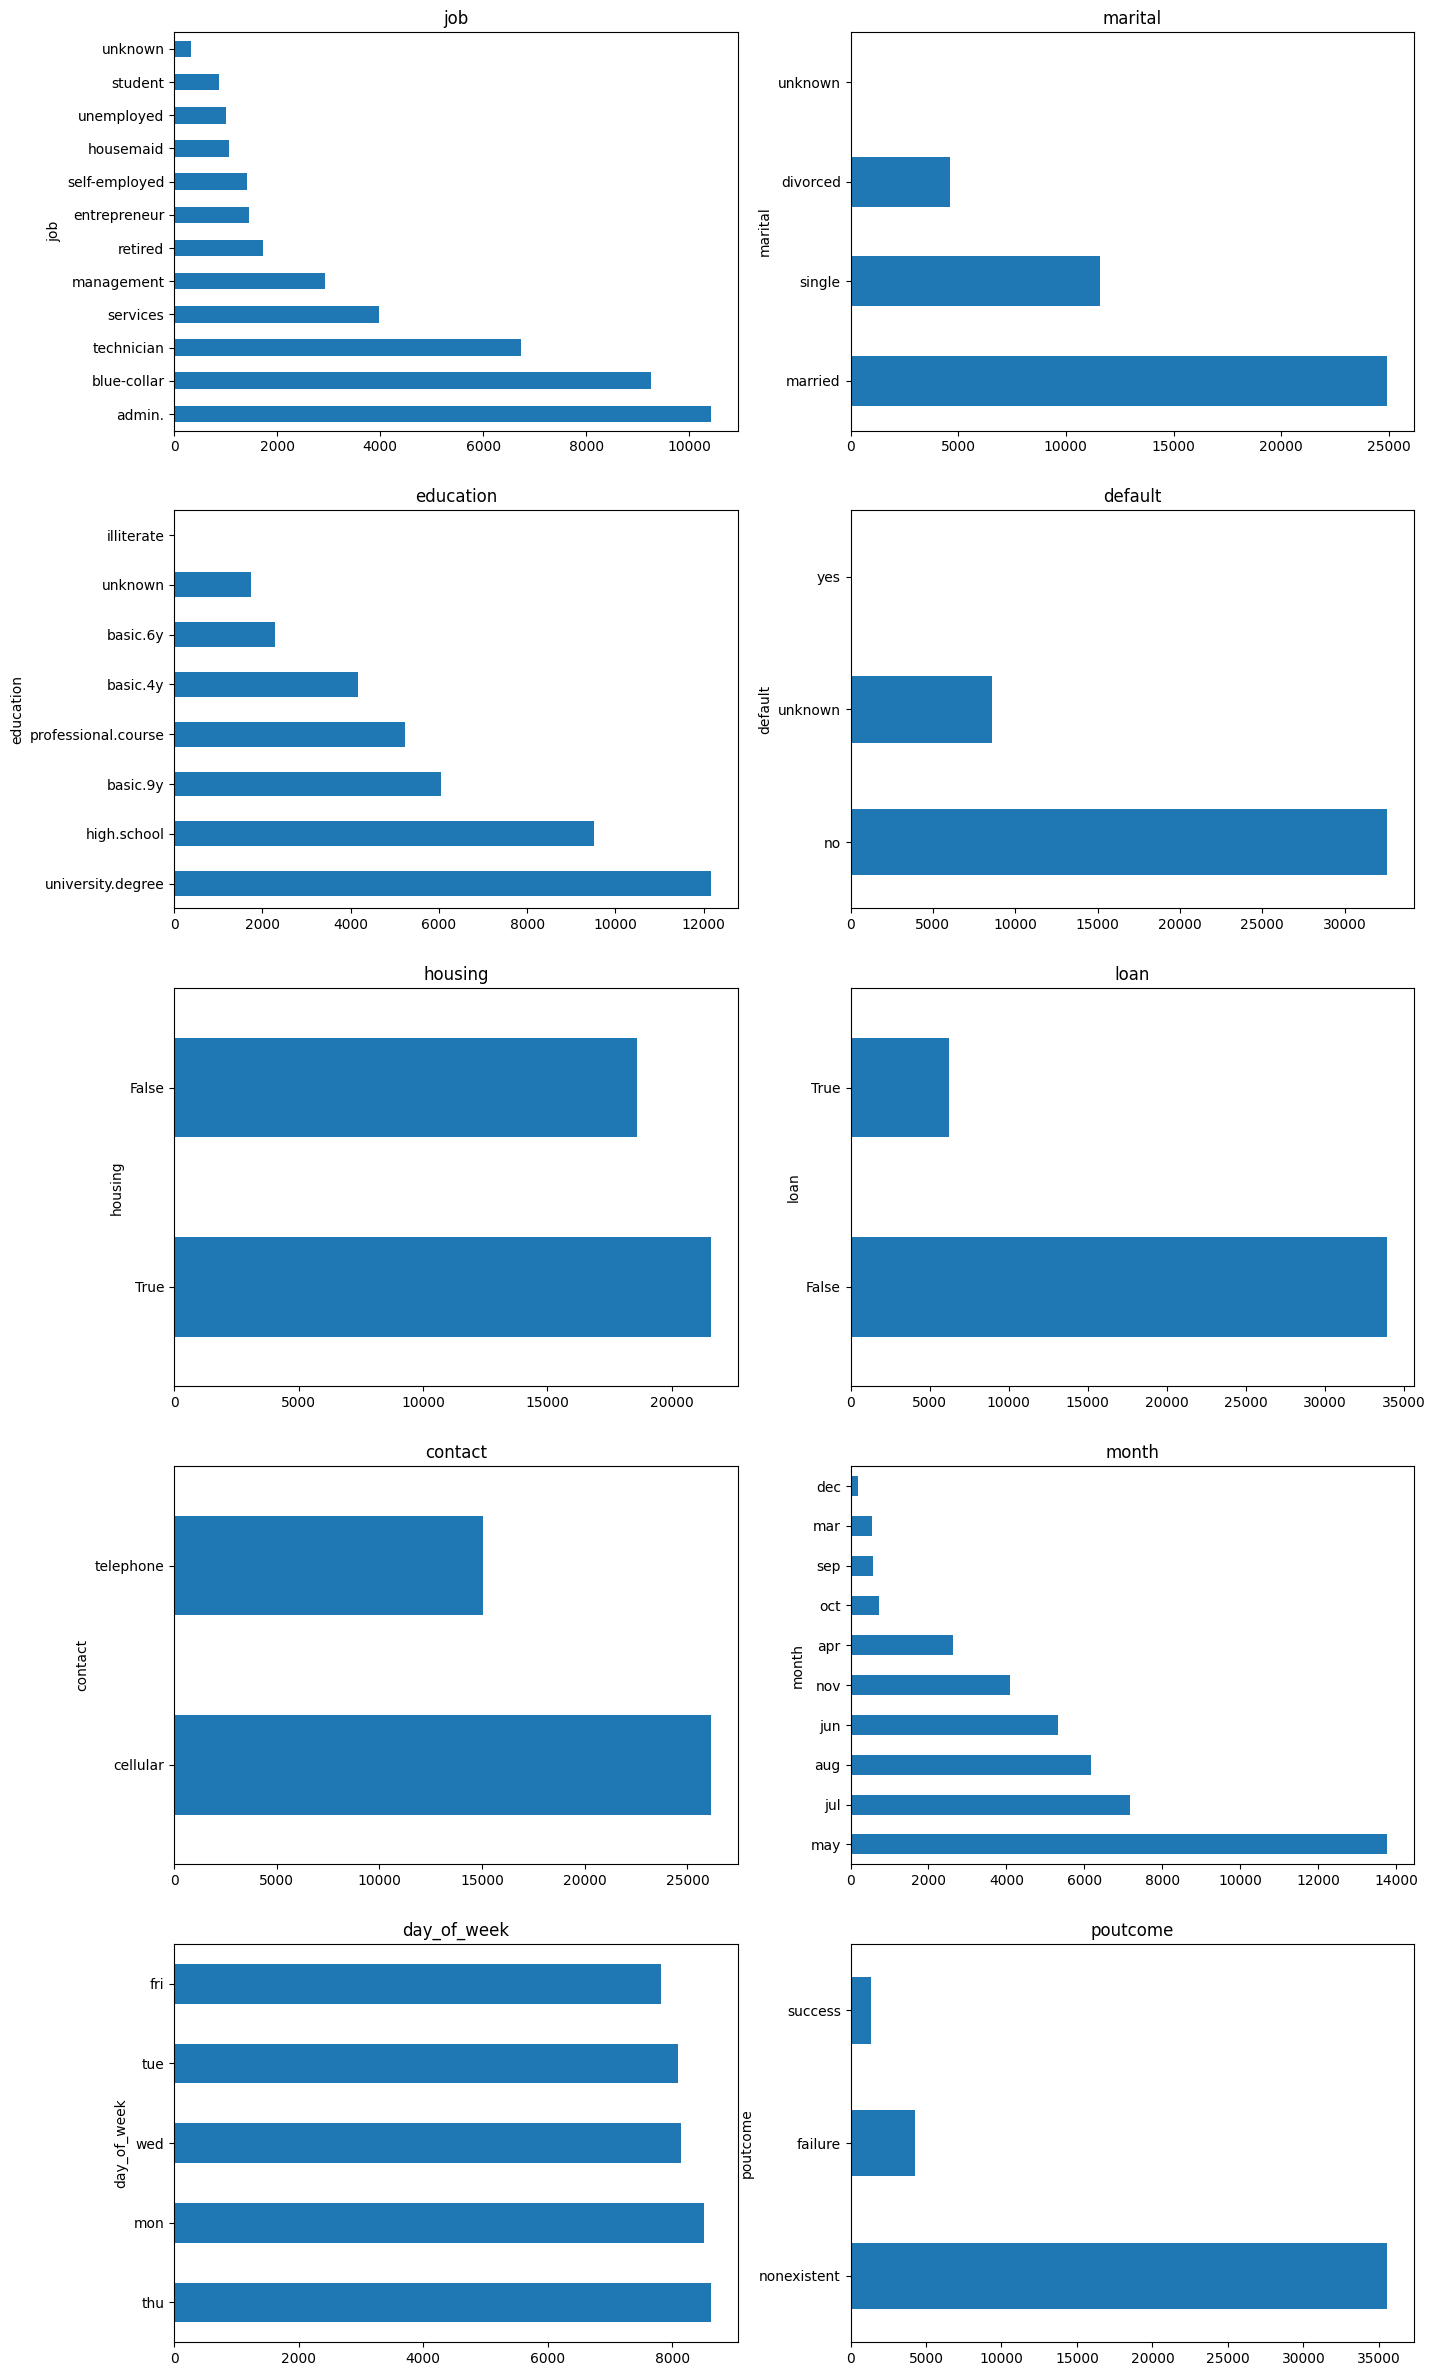

In [6]:
def categoricas(dataframe):
    from math import ceil
    filas = ceil(dataframe.shape[1]/2)
    fig, ax = plt.subplots(ncols = 2, nrows = filas, figsize = (16, filas * 6))
    ax = ax.flat

    for cada, variable in enumerate(dataframe):
        dataframe[variable].value_counts().sort_values(ascending = False).plot.barh(ax = ax[cada])
        ax[cada].set_title(variable)
        

categoricas(marketing.select_dtypes("O"))

In [7]:
def numeric(dataframe):
    estadistica = dataframe.describe().T
    estadistica["median"] = dataframe.mean()
    estadistica = estadistica.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return (estadistica)

numeric(marketing.select_dtypes("number"))

,count,mean,median,std,min,25%,50%,75%,max
age,41188.0,40.024060,40.024060,10.421250,17.0,32.0,38.0,47.0,98.0
duration,41188.0,258.285010,258.285010,259.279249,0.0,102.0,180.0,319.0,4918.0
campaign,41188.0,2.567593,2.567593,2.770014,1.0,1.0,2.0,3.0,56.0
pdays,41188.0,962.475454,962.475454,186.910907,0.0,999.0,999.0,999.0,999.0
previous,41188.0,0.172963,0.172963,0.494901,0.0,0.0,0.0,0.0,7.0
emp_var_rate,41188.0,13.434568,13.434568,1.173293,11.0,14.0,14.0,14.0,14.0
cons_price_idx,41188.0,85475.220355,85475.220355,26234.184351,932.0,92893.0,93749.0,93994.0,94767.0
cons_conf_idx,41188.0,-403.189691,-403.189691,45.099837,-508.0,-427.0,-403.0,-364.0,-269.0
euribor3m,41163.0,3286.953210,3286.953210,1934.597588,7.0,1281.0,4856.0,4961.0,5045.0
nr_employed,7763.0,5191.000000,5191.000000,0.000000,5191.0,5191.0,5191.0,5191.0,5191.0


In [8]:
marketing.drop(columns = "nr_employed", inplace = True)

marketing["housing"] = marketing["housing"].fillna("True")
marketing["loan"] = marketing["loan"].fillna("False")
marketing["euribor3m"] = marketing["euribor3m"].fillna(3286.9)

In [9]:
marketing.isnull().sum().sort_values(ascending=False)

age               0
job               0
euribor3m         0
cons_conf_idx     0
cons_price_idx    0
emp_var_rate      0
poutcome          0
previous          0
pdays             0
campaign          0
duration          0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [10]:
marketing["y"] = np.where(marketing["y"] == True, 1, 0)
marketing["housing"] = np.where(marketing["housing"] == False, 0, 1)
marketing.groupby("y").size()

y
0    36548
1     4640
dtype: int64

In [11]:
y_month = marketing.groupby(["month", "y"])["y"].count().reset_index(name = "Amount").sort_values(by = "Amount", ascending=False)
y_month = pd.pivot_table(data = y_month, index = "month", columns = "y", values = "Amount")

month_contact = marketing.groupby(["month", "contact"])["contact"].count().reset_index(name = "Amount").sort_values(by = "Amount", ascending=False)
month_contact = pd.pivot_table(data = month_contact, index = "month", columns = "contact", values = "Amount")

result = pd.concat([y_month, month_contact], axis = 1)
result["Total_client"] = result["cellular"] + result["telephone"]
result

,0,1,cellular,telephone,Total_client
month,,,,,
apr,2093,539,2445,187,2632
aug,5523,655,5909,269,6178
dec,93,89,149,33,182
jul,6525,649,6096,1078,7174
jun,4759,559,820,4498,5318
mar,270,276,486,60,546
may,12883,886,5518,8251,13769
nov,3685,416,3676,425,4101
oct,403,315,563,155,718


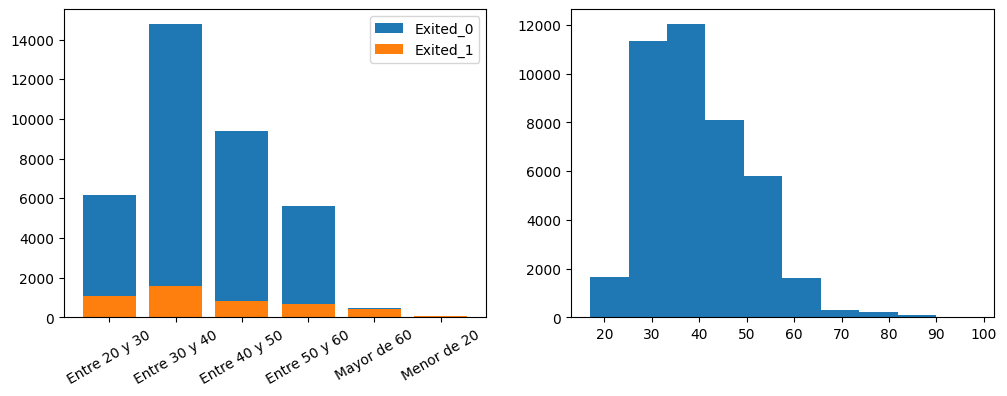

In [12]:
def edad(dataframe, variable):
     if variable <= 20:
          return "Menor de 20"
     elif  20 < variable <= 30:
          return "Entre 20 y 30"
     elif 30 < variable <= 40:
          return "Entre 30 y 40"
     elif 40 < variable <= 50:
          return "Entre 40 y 50"
     elif 50 < variable <= 60:
          return "Entre 50 y 60"
     elif 60 < variable:
          return "Mayor de 60"
     return dataframe

marketing["Range_age"] = marketing["age"].apply(lambda x: edad(marketing,x))


conteo_edad = marketing.groupby(["Range_age", "y"])["y"].count().reset_index(name = "Amount")
conteo_edad = pd.pivot_table(data = conteo_edad, values = "Amount", index = "Range_age", columns = "y")
conteo_edad["Poblacion_total"] = conteo_edad.sum(axis = 1)

fig, ax = plt.subplots(nrows=1, ncols =2, figsize = (12,4))

ax[0].bar(conteo_edad.index, conteo_edad[False], label="Exited_0") #, color = "teal")
ax[0].bar(conteo_edad.index, conteo_edad[True], label="Exited_1") #, color = "springgreen")
ax[0].legend()
ax[0].tick_params(axis = "x", rotation = 30)

ax[1].hist(marketing["age"])
plt.show()

In [13]:
contacto_rango_edad = marketing.groupby(["Range_age","contact", "y"])["y"].count().reset_index(name = "Amount")
contacto_rango_edad = pd.pivot_table(data = contacto_rango_edad, values = "Amount", index = "Range_age", columns = ["contact", "y"])
contacto_rango_edad

contact       cellular       telephone     
y                    0     1         0    1
Range_age                                  
Entre 20 y 30     3955   924      2221  143
Entre 30 y 40     9038  1295      5750  302
Entre 40 y 50     5447   648      3956  189
Entre 50 y 60     3359   558      2243  110
Mayor de 60        427   376        69   38
Menor de 20         65    52        18    5

In [14]:
day_contact = marketing.groupby(["day_of_week", "y"])["y"].count().reset_index(name = "Amount")
day_contact = pd.pivot_table(data = day_contact, index = "day_of_week", columns = "y", values = "Amount")
day_contact["Total"] = day_contact.sum(axis = 1)
day_contact

y,0,1,Total
day_of_week,,,
fri,6981,846,7827
mon,7667,847,8514
thu,7578,1045,8623
tue,7137,953,8090
wed,7185,949,8134


### MODELO XGBOOTS

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import xgboost

In [16]:
df = marketing.copy()
y = df["y"]
df.drop(columns=["age", "loan", "y"], inplace=True)
column_names = df.select_dtypes(include=['number']).columns.tolist()


# TRANSFORMACIONES A VARIABLES NUMERICAS

min_max =  MinMaxScaler(feature_range=(0, 1))
df_numeric = df.select_dtypes("number")
df_numeric = min_max.fit_transform(df_numeric)
df_numeric = pd.DataFrame(data = df_numeric, columns = column_names).reset_index(drop = True)

# TRANSFORMACIONES A VARIABLES CATEGORICAS

ohe = OneHotEncoder(sparse = False)
df_cat = df.select_dtypes("O")
ohe.fit(df_cat)
df_cat_ohe = ohe.transform(df_cat)
df_cat_ohe = pd.DataFrame(df_cat_ohe, columns = ohe.get_feature_names_out(input_features = df_cat.columns)).reset_index(drop = True)

df = pd.concat([df_cat_ohe, df_numeric], axis = 1)
x = df.copy()

c:\Users\pablo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((32950, 62), (8238, 62), (32950,), (8238,))

In [39]:
xgb_model = xgboost.XGBClassifier()

# Definir los parámetros del modelo
params = {
    'objective': 'binary:logistic',  # Para problemas de clasificación binaria
    'max_depth': 5,                  # Profundidad máxima del árbol
    'min_child_weight': 1,           # Peso mínimo requerido en un nodo hijo
    'gamma': 0.1,                    # Parámetro de penalización para la división de nodos
    'eval_metric': 'error'           # Métrica de evaluación, aquí se usa tasa de error
}

xgb_model.set_params(**params)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

In [40]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[7034  269]
 [ 414  521]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.66      0.56      0.60       935

    accuracy                           0.92      8238
   macro avg       0.80      0.76      0.78      8238
weighted avg       0.91      0.92      0.91      8238



In [38]:
feature_import = pd.Series(xgb_model.feature_importances_, index = x_test.columns).sort_values(ascending = False)
feature_import

pdays                   0.124653
month_may               0.111870
duration                0.063148
cons_conf_idx           0.054577
month_mar               0.050143
                          ...   
job_housemaid           0.002723
contact_telephone       0.000000
education_illiterate    0.000000
default_yes             0.000000
default_unknown         0.000000
Length: 62, dtype: float32

In [47]:
marketing["Prob_deposito"] = xgb_model.predict_proba(df)[:,1]
marketing.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,y,Range_age,Prob_deposito
0,22,admin.,married,high.school,no,0,False,telephone,may,tue,...,999,0,nonexistent,11.0,93994.0,-364.0,4857.0,0,Entre 20 y 30,0.000418
1,31,entrepreneur,divorced,high.school,no,1,False,telephone,may,tue,...,999,0,nonexistent,11.0,93994.0,-364.0,4857.0,0,Entre 30 y 40,0.004571
